In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        
        Returns
        -------
        self : object
        """
        assert(X.shape[0] == y.shape[0])
        self.w_ = np.zeros(1 + X.shape[1]) # 1 + 'no_of_features per example'
        self.errors_ = []
        for i in range(self.n_iter):
            error_count = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                if prediction != target:
                    error_count += 1
                
                # update self.w_ with every example
                update = self.eta * (target - prediction)
                self.w_[0] +=  update * 1
                self.w_[1:] += update * xi
            self.errors_.append(error_count)
        return self
    
    def predict(self, X):
        """predicts the output for a given input example or example set
            X : {array-like}, shape = [n_features] or [n_samples, n_features]
                one input or, set of inputs (i.e., complete dataset)
        """
        z = self.w_[0] + np.dot(X, self.w_[1:])
        return np.where(z >= 0, 1, -1)
    

In [3]:
'''
Creating random dataset and testing the synctactical accuracy of the above peceptron model
'''
Xtest = np.array([[2,3,4], [1,2,3], [1,1,0], [2,3,-2]])
ytest = np.array([-1, 1, 1, 1])
perceptron = Perceptron(n_iter=15)
perceptron = perceptron.fit(Xtest, ytest)
print (perceptron.errors_)

[3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [4]:
'''
Using some test data to predict the output using above trained perceptron
'''
Test = np.array([[2,2,4], [1,0,3], [5,1,0]])
for t in Test:
    print (perceptron.predict(t))
perceptron.predict(Test)

-1
1
-1


array([-1,  1, -1])

In [5]:
df = pd.read_csv('flower_dataset.csv', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


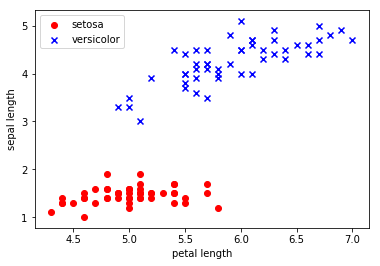

In [6]:
'''
Extract flower data from csv file and save in X and y matrices
'''
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # Iris-setosa is represented as -1, other as 1
X = df.iloc[0:100, [0, 2]].values # xi has first and third columns

'''
Visualize the data
'''
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

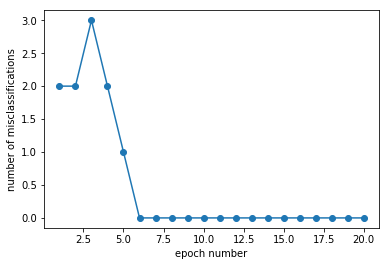

In [7]:
'''
Train perceptron for the flower dataset and visualise training error
'''
ptron = Perceptron(eta=0.2, n_iter=20)
ptron.fit(X, y)
plt.plot(range(1, len(ptron.errors_) + 1), ptron.errors_, marker='o')
plt.xlabel('epoch number')
plt.ylabel('number of misclassifications')
plt.show()

In [8]:
'''
Plot decision boundary for 2D datasets
'''
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    assert(X.shape[1] == 2)
    assert(X.shape[0] == y.shape[0])
    assert(type(classifier) == Perceptron)
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),\
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

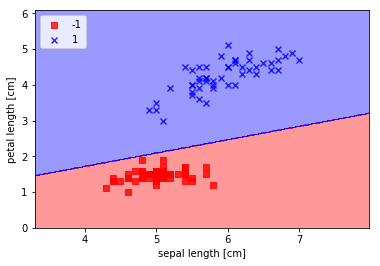

In [9]:
plot_decision_regions(X, y, classifier=ptron)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [10]:
class AdalineGD(object):
    """ADAptice LInear NEuron classifier with gradient descent
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """ Fit training data.
            
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
            
        Returns
        -------
        self : object
        """
        assert(X.shape[0] == y.shape[0])
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = [] # to keep track of the cost with every iteration
        for i in range(self.n_iter):
            Z = self.net_input(X)
            predictions = self.activation(Z)
            errors = y - predictions
            
            # update weights
            self.w_[0] += self.eta * (0.5) * sum(errors)
            temp = np.dot(errors, X) # row vector
            self.w_[1:] += self.eta * (0.5) * temp
            
            # find cost for this iteration
            cost = 0.5 * np.dot(errors, errors)**2
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Find z parameter = w^T*x
        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
            OR
            {array-like}, shape = [n_features]
        
        Returns
        -------
        z : {array-like}, shape = [n_samples]
            net-input for each sample or just a single sample if X is one sample
        """
        z = self.w_[0] + np.dot(X, self.w_[1:])
        return z
    
    def activation(self, Z):
        """Compute the activation function
        
        Parameters
        ----------
        Z : {array-like}, shape = [n_samples]
            net-input for each sample
        
        Returns
        -------
        phi : {array-like}, shape = [n_samples]
        """
        return Z # identity activation function used here
    
    def predict(self, X, threshold=0.0):
        """
        Returns class labels for a dataset using learned classifier
        """
        Z = self.net_input(X)
        output = self.activation(Z)
        return np.where(output >= threshold, 1, -1)

In [11]:
'''
Creating random dataset and testing the synctactical accuracy of the above Adaline model
'''
X_test = np.array([[2,3,4,4], [1,2,3,2], [1,1,0,3], [-2,-3,-2,5], [-3,-2,-6,-5]])
y_test = np.array([1, 1, 1, -1, -1])
adaline_test = AdalineGD(eta=0.01, n_iter=15)
adaline_test.fit(X_test, y_test)
print (adaline_test.cost_)
print (adaline_test.predict(X_test))

[12.5, 1.2939176278124997, 0.6379932064913072, 0.46931744379087387, 0.38155084383172894, 0.32553205297008259, 0.28642177676520197, 0.25722427441402879, 0.23419312071023474, 0.21522045149288735, 0.19907719067048274, 0.18502051470787254, 0.1725830063947888, 0.16145666343252116, 0.15142796535379285]
[ 1  1  1 -1 -1]


In [12]:
'''
Test training accuracy for adaline for the given flower training dataset
'''
print(X.shape, y.shape) # loaded before in the notebook
adaline = AdalineGD(eta=0.0001, n_iter=50)
adaline.fit(X, y)
output = adaline.predict(X)
error_rate = sum(output != y)*100/len(output)
print (error_rate)

(100, 2) (100,)
0.0


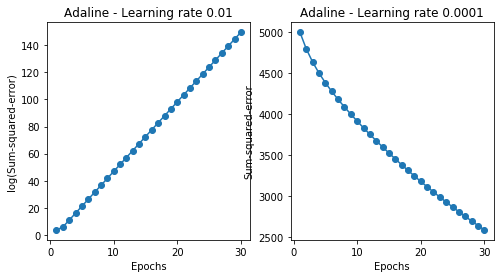

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=30, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=30, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()